<a href="https://colab.research.google.com/github/Billy-Ay/CSCI-164-Summer-Course/blob/main/Classification_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from mlxtend.plotting import plot_decision_regions

In [2]:
# prompt: Please generate code to read a database file called "diabetesNHANES.csv" from my google drive and load it into a pandas data frame called "diabetes".

from google.colab import drive

drive.mount('/content/drive')

diabetes = pd.read_csv('/content/drive/My Drive/diabetesNHANES.csv')

#diabetesFileNames = '/content/drive/My Drive/diabetesNHANES.csv'

#diabetes = pd.read_csv(diabetesFileNames)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the diabetes dataset
#diabetes = pd.read_csv('diabetesNHANES.csv')

# Take a random sample of 100 rows
df = diabetes.sample(n=100, random_state=1234)
df.head()

,SEQN,diabetes,glucose,insulin,cholesterol,outcome,systolic,diastolic
1326,101937,no,5.38,30.01,157,0,80,135
208,98270,yes,5.44,3.82,148,1,73,151
358,102289,yes,5.50,31.22,193,1,62,105
930,97041,no,5.05,11.27,134,0,69,104
319,101046,yes,8.55,13.52,105,1,69,137


## Binary outcome, two input features

In [4]:
# Define input features and output features
X = df[['glucose', 'cholesterol']]
y = df[['outcome']]

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
# Initialize and fit a LDA model
ldaModel = LinearDiscriminantAnalysis()
ldaModel.fit(X, np.ravel(y))

LinearDiscriminantAnalysis()

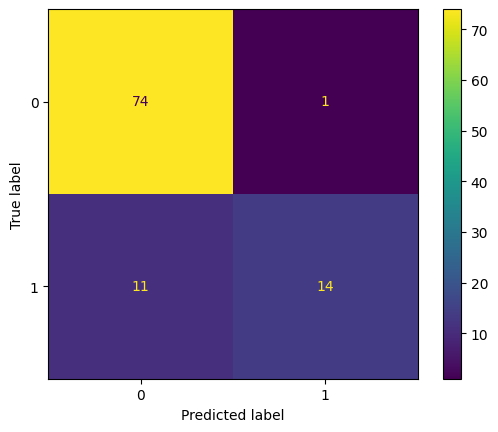

In [6]:
# Confusion matrix plot for ldaModel
ConfusionMatrixDisplay.from_estimator(ldaModel, X, y)
plt.show()

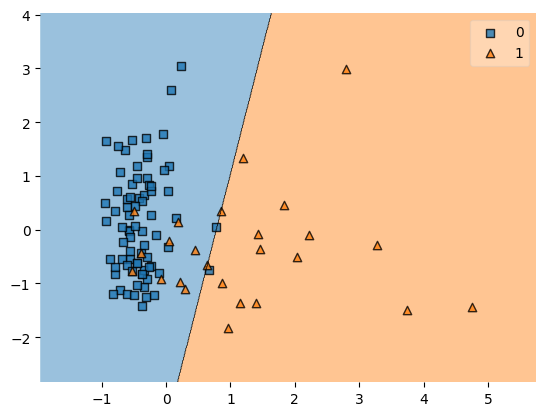

In [7]:
# Decision boundary plot for ldaModel
plot_decision_regions(X, np.ravel(y), clf=ldaModel)
plt.show()

In [8]:
# Initialize and fit a Gaussian naive Bayes model
gnbModel = GaussianNB()
gnbModel.fit(X, np.ravel(y))

GaussianNB()

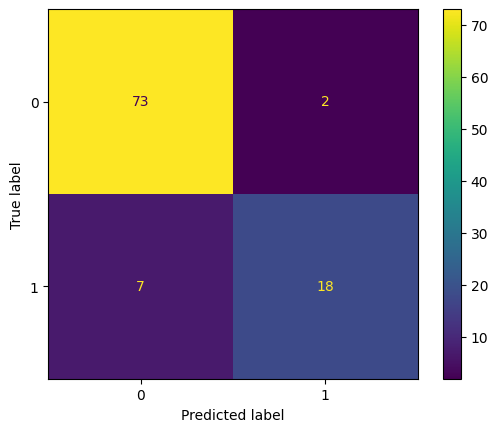

In [9]:
# Confusion matrix plot for gnbModel
ConfusionMatrixDisplay.from_estimator(gnbModel, X, y)
plt.show()

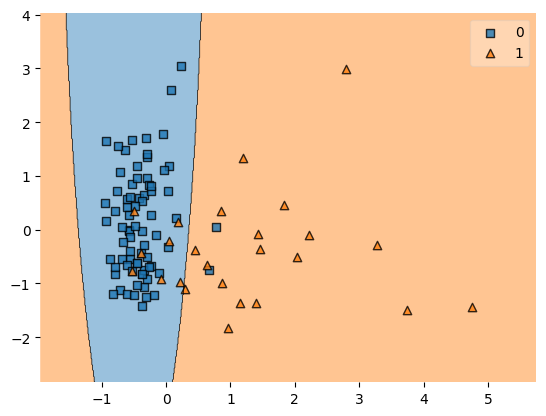

In [10]:
# Decision boundary plot for ldaModel
plot_decision_regions(X, np.ravel(y), clf=gnbModel)
plt.show()

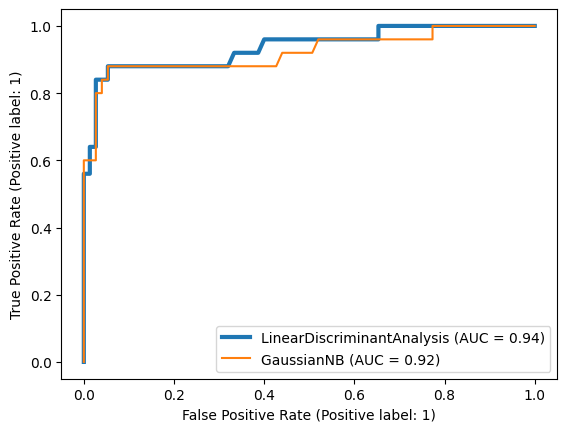

In [11]:
# ROC curves for both ldaModel and gnbModel

# ROC curve for ldaModel
lda_plot = RocCurveDisplay.from_estimator(ldaModel, X, y, linewidth=3)

# ROC curve for gnbModel, added to lda_plot by adding ax=lda_plot.ax_
gnb_plot = RocCurveDisplay.from_estimator(gnbModel, X, y, ax=lda_plot.ax_, linewidth=1.5)
plt.show()

In [12]:
# Compute AUC for ldaModel
ldaAUC = roc_auc_score(y, ldaModel.predict_proba(X)[:, 1])
print('LDA AUC = ', ldaAUC)

# Compute AUC for gnbModel
gnbAUC = roc_auc_score(y, gnbModel.predict_proba(X)[:, 1])
print('GaussianNB AUC = ', gnbAUC)

LDA AUC =  0.9365333333333333
GaussianNB AUC =  0.9221333333333334


## Multi-class outcome, two input features

In [13]:
# Create integer-valued diabetes
df['diabetes_int'] = df['diabetes'].replace(to_replace = ['no','pre', 'yes'],
                                                      value = [int(0), int(1), int(2)])

# Define input features and output features
X = df[['glucose', 'cholesterol']]
yMC = df[['diabetes_int']]

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
# Initialize and fit a k-nearest neighbors model
knnModel = KNeighborsClassifier(n_neighbors=7)
knnModel.fit(X, np.ravel(yMC))

KNeighborsClassifier(n_neighbors=7)

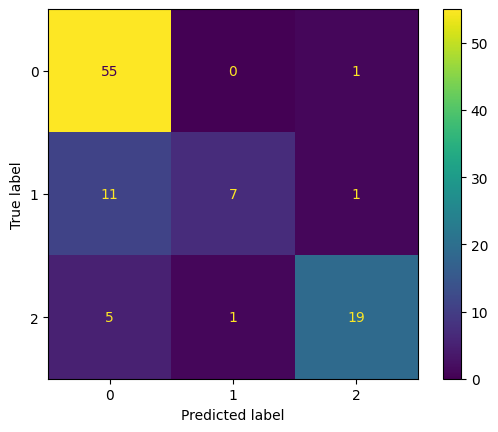

In [15]:
# Confusion matrix plot for knnModel
ConfusionMatrixDisplay.from_estimator(knnModel, X, yMC)
plt.show()

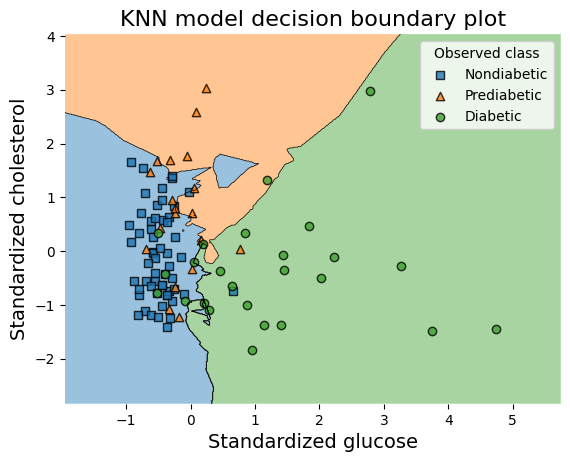

In [16]:
# Plot decision boundary regions
p=plot_decision_regions(X, np.ravel(yMC), clf=knnModel)

# Add title and axis labels
p.set_title('KNN model decision boundary plot', fontsize=16)
p.set_xlabel('Standardized glucose', fontsize=14)
p.set_ylabel('Standardized cholesterol', fontsize=14)

# Add legend
L = plt.legend(title='Observed class')
L.get_texts()[0].set_text('Nondiabetic')
L.get_texts()[1].set_text('Prediabetic')
L.get_texts()[2].set_text('Diabetic')

plt.show()

## Logistic regression model, binary outcome

In [17]:
# Define input features and output features
X = df[['glucose', 'cholesterol']]
y = df[['outcome']]

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize and fit a logistic regression model
LRModel = LogisticRegression(penalty=None)
LRModel.fit(X, np.ravel(y))

LogisticRegression(penalty=None)

### Add code below to generate plots for the fitted logistic regression model

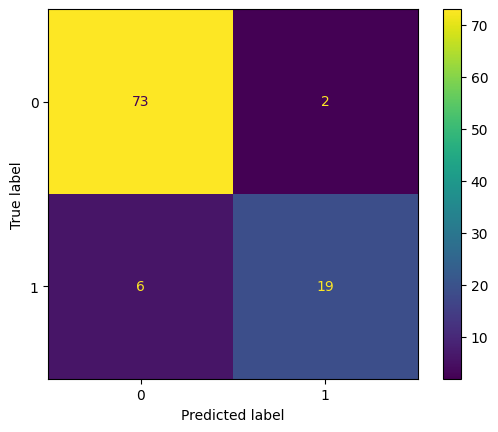

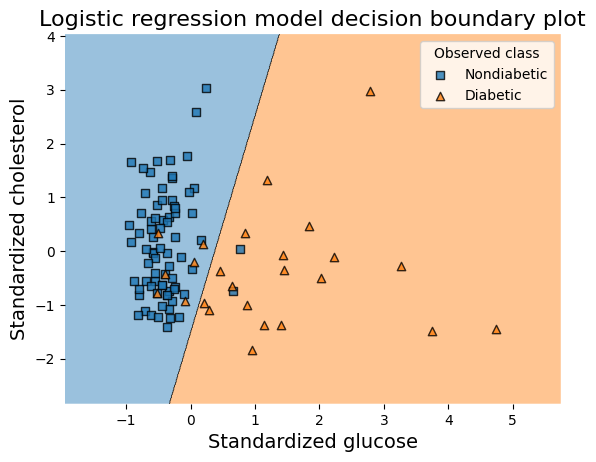

In [18]:
# prompt: generate code to create a plot for the fitted logistic regression model to predict the binary output feature

# Confusion matrix plot for LRModel
ConfusionMatrixDisplay.from_estimator(LRModel, X, y)
plt.show()
# Plot decision boundary regions for LRModel
p=plot_decision_regions(X, np.ravel(y), clf=LRModel)

# Add title and axis labels
p.set_title('Logistic regression model decision boundary plot', fontsize=16)
p.set_xlabel('Standardized glucose', fontsize=14)
p.set_ylabel('Standardized cholesterol', fontsize=14)

# Add legend
L = plt.legend(title='Observed class')
L.get_texts()[0].set_text('Nondiabetic')
L.get_texts()[1].set_text('Diabetic')

plt.show()


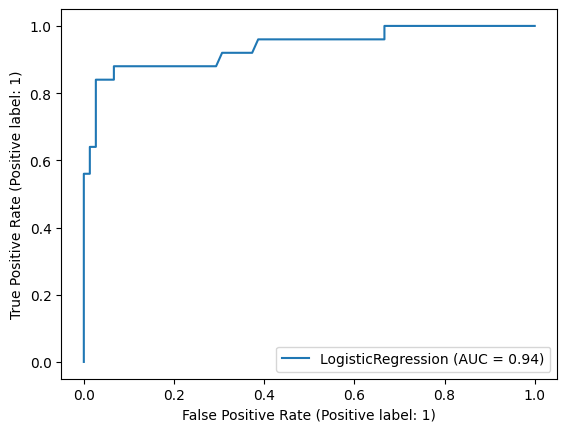

In [19]:
# prompt: can you generate code that will create a ROC curve for the fitted logistic regression model

from sklearn.metrics import RocCurveDisplay

# Generate ROC curve for the fitted logistic regression model
RocCurveDisplay.from_estimator(LRModel, X, y)

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


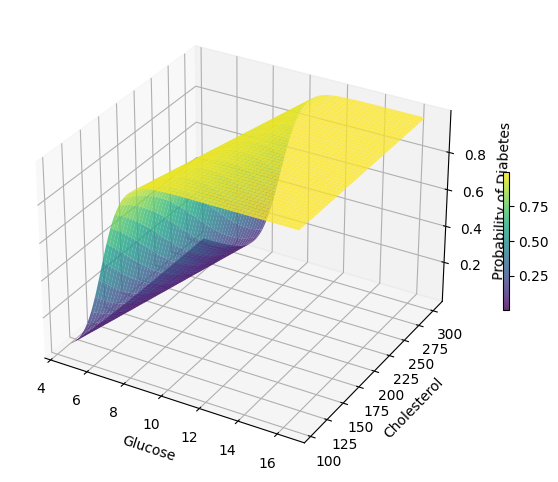

In [33]:
# prompt: generate code to create a 3D plot for the fitted logistic regression model to predict the binary output feature

from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid of glucose and cholesterol values
glucose_range = np.linspace(df['glucose'].min(), df['glucose'].max(), 100)
cholesterol_range = np.linspace(df['cholesterol'].min(), df['cholesterol'].max(), 100)
glucose, cholesterol = np.meshgrid(glucose_range, cholesterol_range)

# Predict the probability of diabetes for each point in the meshgrid
diabetes_proba = LRModel.predict_proba(scaler.transform(np.c_[glucose.ravel(), cholesterol.ravel()]))[:, 1]

# Reshape the probability values to match the meshgrid shape
diabetes_proba = diabetes_proba.reshape(glucose.shape)

# Plot the decision boundary surface
surf = ax.plot_surface(glucose, cholesterol, diabetes_proba, cmap='viridis', alpha=0.8)

# Set the axes labels and title
ax.set_xlabel('Glucose', fontsize=10)
ax.set_ylabel('Cholesterol', fontsize=10)
ax.set_zlabel('Probability of Diabetes', fontsize=10)

# Add a colorbar
fig.colorbar(surf, shrink=0.3, aspect=25)

# Show the plot
plt.show()


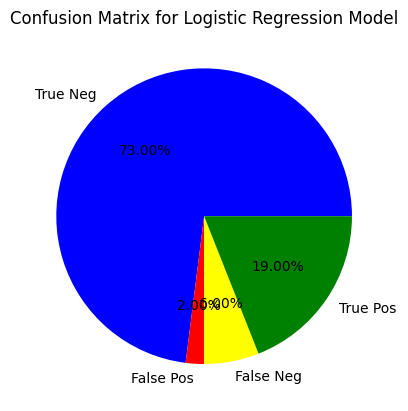

In [50]:
# prompt: can you generate a pie chart from the confusion matrix of the logistic regression model

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(y, LRModel.predict(X))

# Define labels for the pie chart
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Define colors for the pie chart
colors = ['blue', 'red', 'yellow', 'green']

# Create the pie chart
plt.pie(cm.ravel(), labels=labels, autopct="%.02f%%", colors=colors)

# Add a title
plt.title('Confusion Matrix for Logistic Regression Model')

# Show the plot
plt.show()
